# Визуализация временных рядов

Проведем импорт необходимых библиотек

In [2]:
try:
    import pandas as pd 
except:
    !pip install pandas
finally:
    import pandas as pd 

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates#Date Parser

import seaborn as sns
sns.set_style('white')
sns.set(rc={'figure.figsize':(11, 4)})

## Загрузка данных в Pandas

Для анализа выбран набор данных Beer Consumption - Sao Paulo - потребление пива в Сан Паулу за 2015 год. Данные (выборка) были собраны в Сан-Паулу (Бразилия), в университетском районе, где проходят вечеринки с группами студентов в возрасте от 18 до 28 лет (в среднем). Набор данных имеет 7 атрибутов и 365 записей.

In [4]:
df_all = pd.read_csv('Consumo_cerveja.csv', parse_dates=True, low_memory=False)
df_all.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [5]:
df = df_all.dropna(how='all') 
df.sample(5, random_state=42)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
193,2015-07-13,"22,06","16,7","28,7",0,0.0,25.640
33,2015-02-03,"23,16",18,"31,1","1,6",0.0,31.655
15,2015-01-16,"26,5","22,3","32,7",2,0.0,29.938
309,2015-11-06,"19,76",18,"22,8",0,0.0,20.575
57,2015-02-27,"24,64","20,4","31,4","0,6",0.0,26.241


Теперь набор представляет собой ежедневное потребление пива (в литрах) в Сан Паулу. Набор включает следующие временные ряды в виде колонок:
* `Data` — дата в формате гггг-мм-дд;
* `Temperatura Media (C)` — средняя температура за день, градусы Цельсия;
* `Temperatura Minima (C)` — минимальная температура за день, градусы Цельсия;
* `Temperatura Maxima (C)` — максимальная температура за день, градусы Цельсия;
* `Precipitacao (mm)` — осадки за день, мм;
* `Consumo de cerveja (litros)` — Потребление пива в литрах.

Проведем анализ сформированного набора данных

Размер набора данных

In [6]:
print(df.shape)

(365, 7)


Информация о колонках в наборе 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


Описание суммарных статистик данных

In [8]:
df.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


Типы данных

In [9]:
df.dtypes

Data                            object
Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitacao (mm)               object
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object

Введение индексов-дат

In [10]:
df.Data = pd.to_datetime(df.Data)
df.set_index('Data', inplace=True)
df.sample(15, random_state=42)

C:\Users\Killroy\AppData\Local\Temp\ipykernel_20056\370261212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Data = pd.to_datetime(df.Data)


,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Data,,,,,,
2015-07-13,"22,06","16,7","28,7",0,0.0,25.640
2015-02-03,"23,16",18,"31,1","1,6",0.0,31.655
2015-01-16,"26,5","22,3","32,7",2,0.0,29.938
2015-11-06,"19,76",18,"22,8",0,0.0,20.575
2015-02-27,"24,64","20,4","31,4","0,6",0.0,26.241
2015-07-03,"17,52","15,6","18,4","17,8",0.0,14.940
2015-03-18,"21,24","19,7","24,1",0,0.0,20.167
2015-04-30,"16,22","14,7","18,7",0,0.0,20.452
2015-06-02,"16,04",15,"17,5","0,5",0.0,20.106


Данные обработанные в форме дат `DateTimeIndex` позволяют работать с индексом как с датой

In [11]:
print(df.index.day)
print(df.index.weekday)
print(df.index.year)

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int32', name='Data', length=365)
Index([3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       ...
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3],
      dtype='int32', name='Data', length=365)
Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       ...
       2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
      dtype='int32', name='Data', length=365)


Теперь мы можем обращаться к данным по дате

In [12]:
df.loc['2015-08-10']

Temperatura Media (C)            21,2
Temperatura Minima (C)           15,6
Temperatura Maxima (C)             28
Precipitacao (mm)                   0
Final de Semana                   0.0
Consumo de cerveja (litros)    23.181
Name: 2015-08-10 00:00:00, dtype: object

Данные можно представлять с нужной частотой при помощи метода `asfreq`, например с частотой `D` - день, `W`,`M`,`Y` для недели, месяца и года соответственно.

In [13]:
df.loc['2015':].asfreq('Y').set_index(df.loc['2015':].asfreq('Y').index.year)

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Data,,,,,,
2015,"24,76","20,2",29,0,0.0,22.446


Для индексов в формате дат также доступно группирование  методом ``` groupby```. Группирование ``` groupby``` происходит по заданным периодам, например `W`, 'Y' или `A` (год), `'2y'` (по 2 года) и т.д.


Часто после использования методов  ``` groupby```, ```asfreq```, а также ``` groupby``` используется некоторая функция итога, например,  `sum`, `mean`, `median` or `std`.  

In [14]:
df.groupby(pd.Grouper(freq='1m')).sum()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Data,,,,,,
2015-01-31,"27,327,0224,8223,9823,8223,782424,928,226,7627...","23,924,522,421,52120,119,519,521,922,122,221,4...","32,533,529,928,628,330,533,732,83434,234,835,4...","0001,2012,2048,64,403,400,81,632003,70,60313,6...",9.0,889.007
2015-02-28,"24,1622,4823,1622,1220,2821,0621,8622,762423,9...","20,620,71819,919,117,917,317,119,320,119,923,1...","2826,531,123,722,925,428,729,530,72930,432,732...","04,51,63,25,618,416,710,4032,22,200017,422,785...",8.0,718.848
2015-03-31,"21,2622,1623,1623,6824,4222,621,9222,221,3623,...","18,217,219,518,919,719,419,419,719,721,220,119...","26,329,229,530,531,628,526,624,423,326,928,126...","30000038,269,2779,79,51,2012,20,322,424,203,27...",9.0,776.128
2015-04-30,"22,5220,9221,0222,3622,8221,3617,3818,6819,420...","19,218,216,317,920,118,516,114,715,91717,216,8...","27,526,227,229,426,427,72024,325,625,528,425,7...","0000007,10,4000000025,437,20020,202,414,6000,8...",8.0,738.723
2015-05-31,"17,3419,2621,0419,9618,1417,7617,816,1418,0416...","13,414,715,817,916,615,915,813,913,713,715,714...","2226,426,322,320,820,421,719,226,12120,621,718...","00019,90000022,202,80000000,200000001,87,205,6",10.0,706.750
2015-06-30,"16,2816,0417,9418,3618,3219,6620,6220,8620,322...","15,2151514,614,113,815,915,215,215,517,516,915...","1817,521,724,125,326,126,226,42626,226,923,527...","2,20,500000000000009003,800003,8100000",8.0,708.812
2015-07-31,"17,7817,217,5214,9412,915,7816,817,0217,5419,2...","16,215,115,610,91111,313,314,915,314161416,718...","20,519,918,42114,520,620,218,720,425,419,827,4...","01,617,815,24,4004,5000300000000000016,6200000",8.0,699.759
2015-08-31,"19,7820,121,1621,0420,9621,0622,0821,1619,6221...","14,313,814,915,21516,315,51615,615,615,214,114...","26,426,326,927,427,227,728,927,826,22827,226,6...","0000000000000000000010002,40,62,625000",10.0,803.178
2015-09-30,"21,4416,119,316,6616,1216,4818,7217,0818,8218,...","17,214,114,815,214,413,313,815,815,813,914,112...","30,720,22519,318,519,924,419,222,925,621,815,6...","00,4002,400,123,658031,827,600,20000000000028,...",8.0,755.944


In [15]:
df.asfreq('1w').head(3)

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Data,,,,,,
2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
2015-01-11,"27,62","22,2","34,8","3,4",1.0,36.254
2015-01-18,"28,26","23,4","35,6",0,1.0,30.524


In [16]:
df.isna().sum()

Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

## Визуализация временного ряда


Для начала давайте посмотрим на наиболее простой тип визуализации для одного из столбцов наших данных

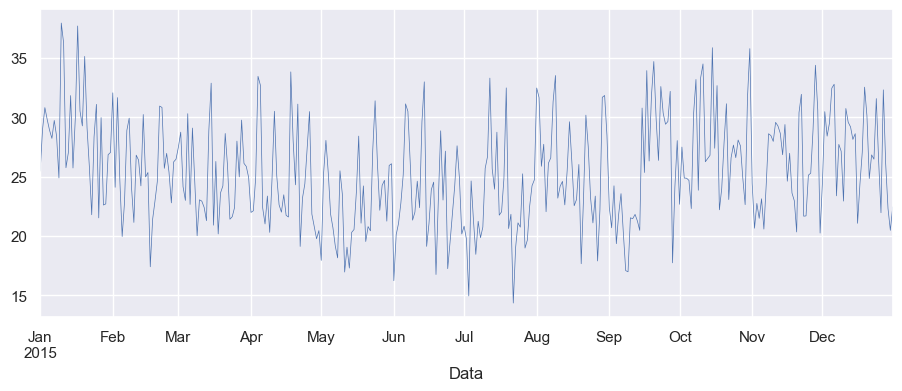

In [17]:
df['Consumo de cerveja (litros)'].plot(linewidth=0.5);

In [18]:
df.columns

Index(['Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [19]:
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].str.replace(',', '.')
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].astype(float)
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].str.replace(',', '.')
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].astype(float)
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].str.replace(',', '.')
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].astype(float)
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].str.replace(',', '.')
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].astype(float)

C:\Users\Killroy\AppData\Local\Temp\ipykernel_20056\3982599089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temperatura Media (C)'] = df['Temperatura Media (C)'].str.replace(',', '.')
C:\Users\Killroy\AppData\Local\Temp\ipykernel_20056\3982599089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temperatura Media (C)'] = df['Temperatura Media (C)'].astype(float)
C:\Users\Killroy\AppData\Local\Temp\ipykernel_20056\3982599089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

Также давайте попробуем визуализировать и остальные столбцы

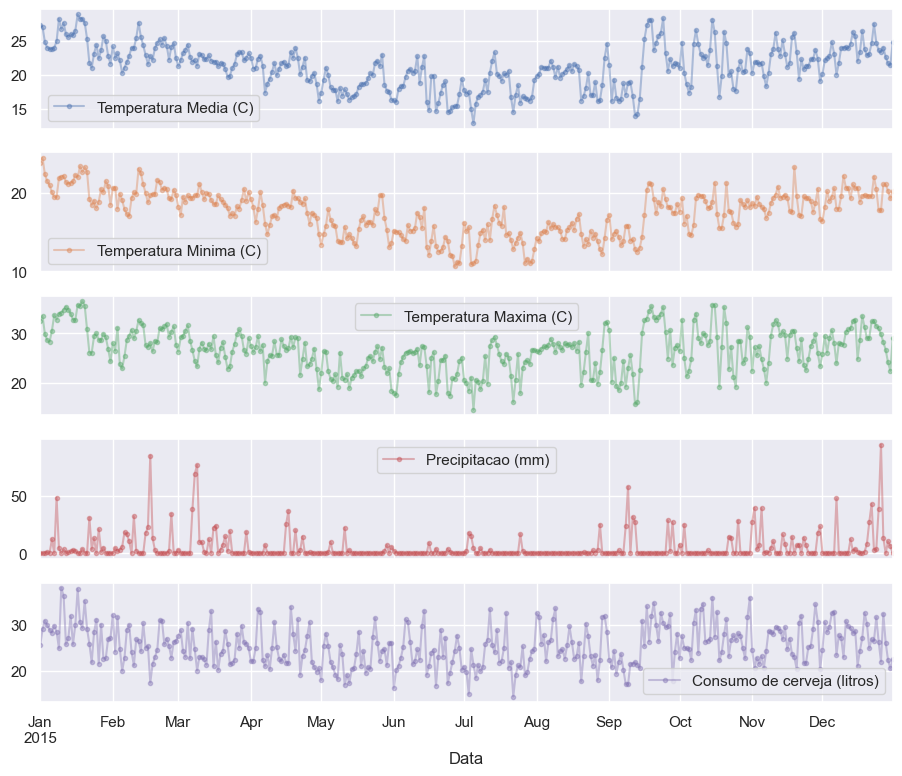

In [20]:
cols_plot = ['Temperatura Media (C)', 
             'Temperatura Minima (C)',
             'Temperatura Maxima (C)', 
             'Precipitacao (mm)',
             'Consumo de cerveja (litros)']
axes = df[cols_plot].plot(marker='.', 
                          alpha=0.4, 
                          linestyle='-', 
                          figsize=(11, 9), 
                          subplots=True)


Предварительно можно сделать вывод о прямой зависимости объема потребления пива от температуры воздуха и обратной - от количества осадков. 

Теперь попробуем провести визуализацию на одном графике, с периодом 1 месяц.

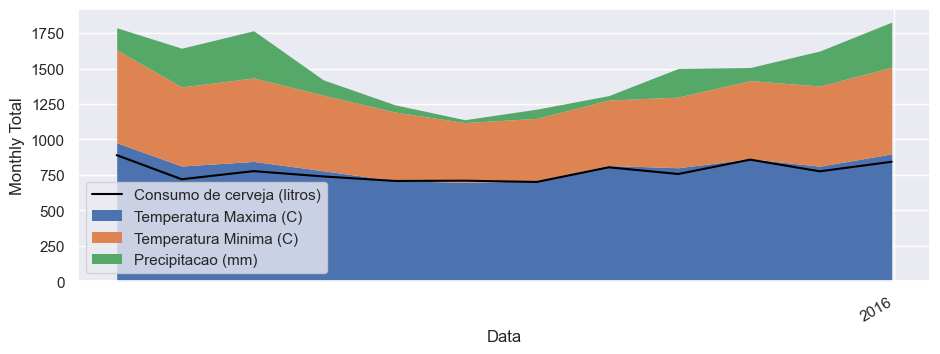

In [23]:
df_monthly = df.resample('M').sum(min_count=7)


fig, ax = plt.subplots()
ax.plot(df_monthly['Consumo de cerveja (litros)'], color='black', label='Consumo de cerveja (litros)')

df_monthly[['Temperatura Maxima (C)', 'Temperatura Minima (C)', 'Precipitacao (mm)']].plot.area(ax=ax, linewidth=0)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total');

Гипотеза о зависимости между температурой и осадками подтверждается. Спад потребления приходится на середину года (климатическую зиму для Бразилии). 

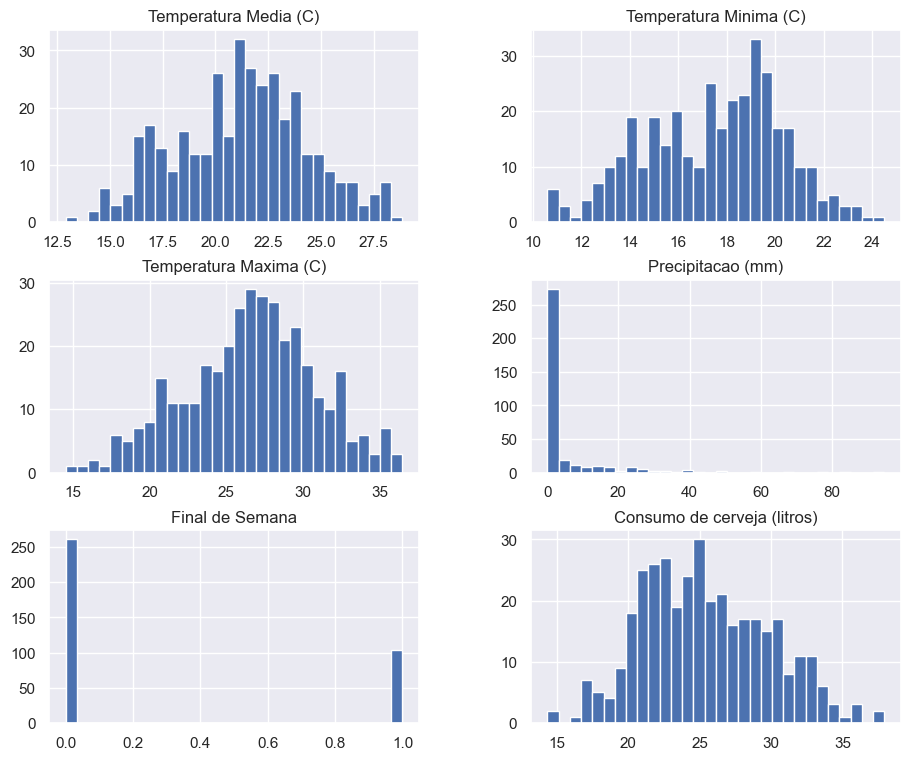

In [24]:
ax = df.hist(bins=30, figsize=(11, 9))
# ax = df.Consumption.plot(kind='kde' )
# ax.set_ylabel('Count of samples')
# ax.set_xlabel('GWh consumption')
plt.show()

Воспользуемся дополнительным столбцом датасета, содержащим информацию об уикендах. 

C:\Users\Killroy\AppData\Local\Temp\ipykernel_20056\3187145923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Final de Semana'] = df['Final de Semana']*35


<Axes: xlabel='Data'>

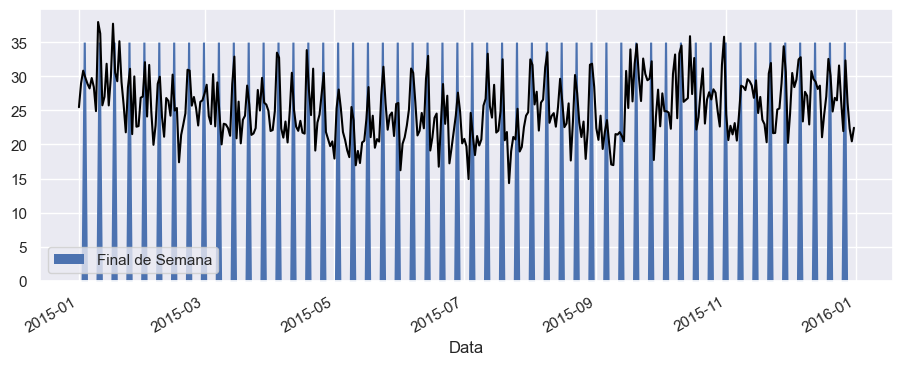

In [25]:
cols_plot = ['Final de Semana',
             'Consumo de cerveja (litros)']
df['Final de Semana'] = df['Final de Semana']*35
fig, ax = plt.subplots()
ax.plot(df['Consumo de cerveja (litros)'], color='black', label='Consumo de cerveja (litros)')

df[['Final de Semana']].plot.area(ax=ax, linewidth=0)


Пики потребления ожидаемо совпадают с моментом наступления уикенда.

Праздничные и нерабочие дни:
* 1 января — Новый год;
* 20 января — День основания Рио-де-Жанейро;
* Февраль – март — Карнавал (празднуется за 47 дней до Пасхи);
* Март – апрель — Пасха (празднуется в первый воскресный день после первого полнолуния, которое наступает не ранее весеннего равноденствия, между 22 марта и 25 апреля);
* 21 апреля — Тирадентис (национальный герой);
* 1 мая — Праздник Труда;
* Май – июнь — Праздник Corpus Christi – Тело Христово (празднуется на 60 день после Пасхи);
* 7 сентября — День независимости (от Португалии);
* 12 октября — Явление Богородицы;
* 2 ноября — День Всех Святых;
* 15 ноября — День провозглашения Республики;
* 24, 25 декабря — Рождество.

Явной зависимости между праздничными датами и потреблением пива не выявлено.

Также проверим наличие сезонных составляющих у ряда с помощью усреднения по месяцам.
    


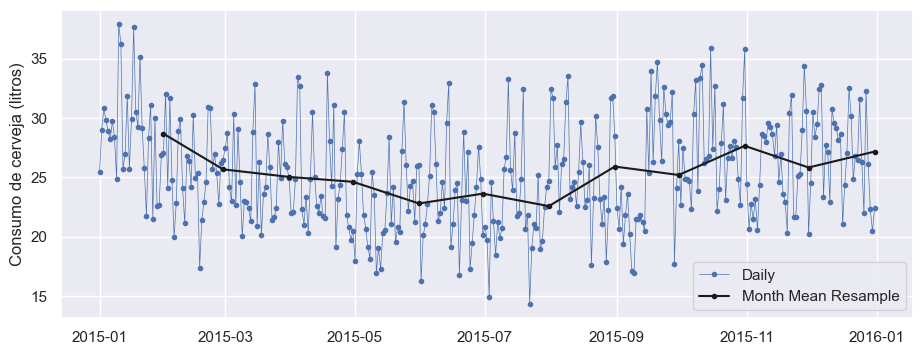

In [26]:
start, end = '2015-01', '2016-01'

fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Consumo de cerveja (litros)'],marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df.resample('M').mean().loc[start:end, 'Consumo de cerveja (litros)'], marker='o', markersize=3, linestyle='-', label='Month Mean Resample', color='k')
ax.set_ylabel('Consumo de cerveja (litros)')
ax.legend();

А также проверим тренд при помощи построения боксплотов.

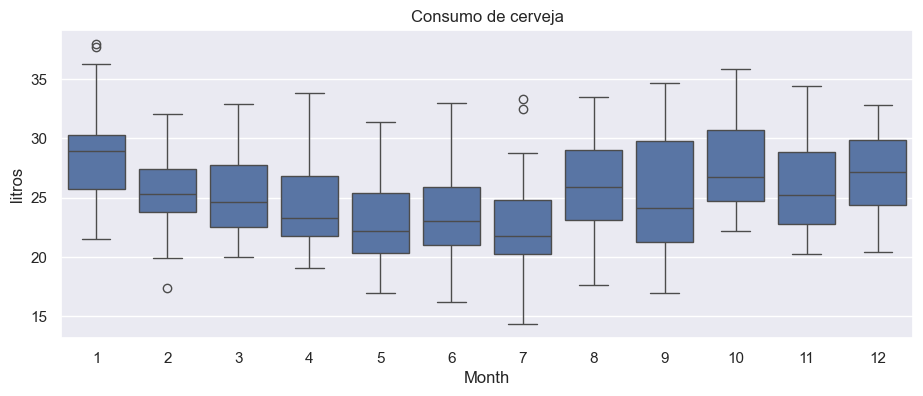

In [27]:
ax = sns.boxplot(data=df, x=df.index.month, y='Consumo de cerveja (litros)')
ax.set_ylabel('litros')
ax.set_xlabel('Month')
ax.set_title('Consumo de cerveja')
plt.show()

И также боксплотов по дням недели.

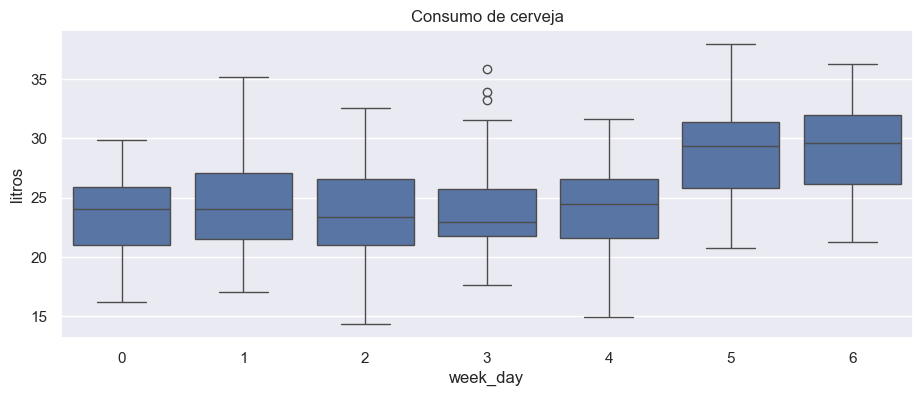

In [28]:
ax = sns.boxplot(data=df, x=df.index.weekday, y='Consumo de cerveja (litros)')
ax.set_ylabel('litros')
ax.set_xlabel('week_day')
ax.set_title('Consumo de cerveja')
plt.show()

Гипотеза о росте потребления в уикенды подтверждается.